# Clustering
## Intro
We will create a simple random dataset and create clustering using 2 different clustering algorithms.
Specifically K-Means and DBSCAN that have different properties and strength.



In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs

RANDOM_SEED = 0

## Dataset
Create a 2D dataset with 4 centers and show the corresponding plot

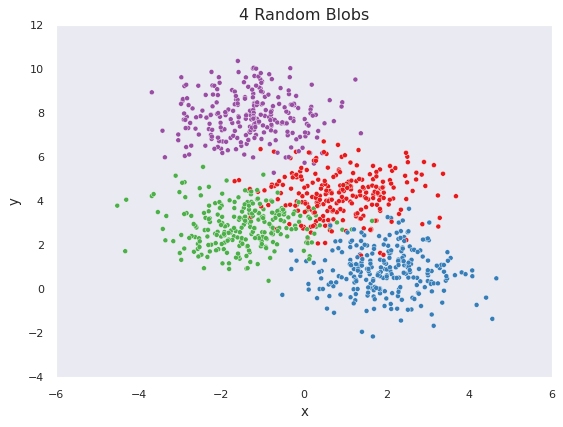

In [97]:
sns.set_style("dark")

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=RANDOM_SEED)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

sns.scatterplot(x="x", y="y", data=df, hue='label', palette='Set1', legend=False)
plt.title("4 Random Blobs")
plt.show()

## K-Means
Start with the k-means clustering algorithm and adjust for different number of clusters

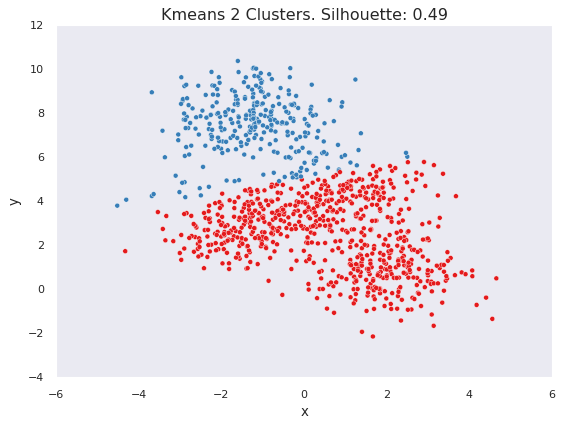

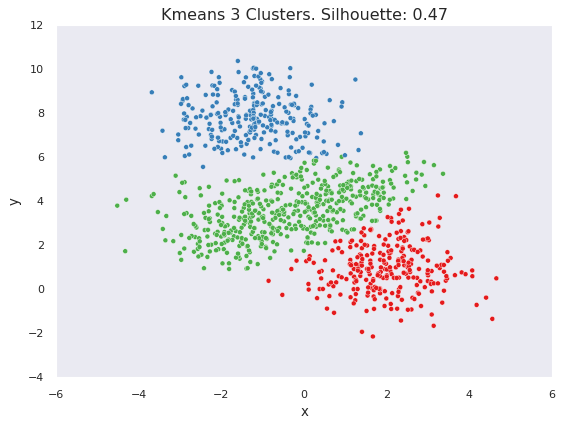

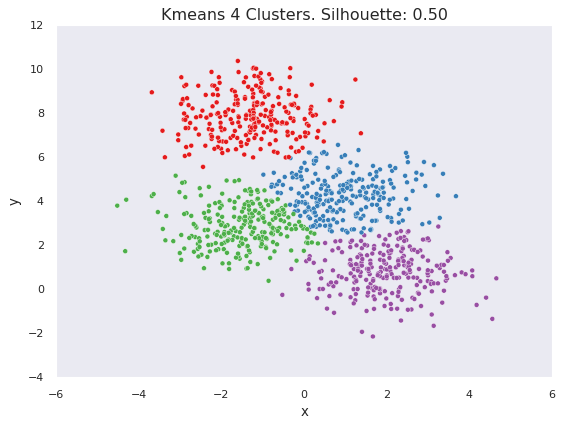

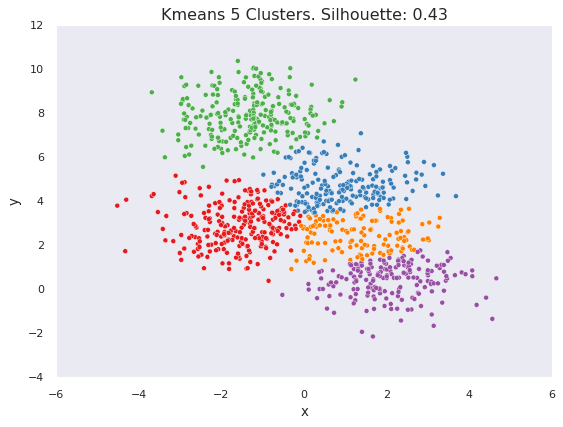

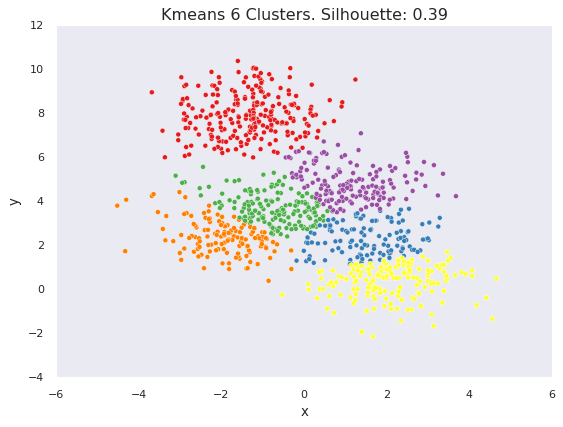

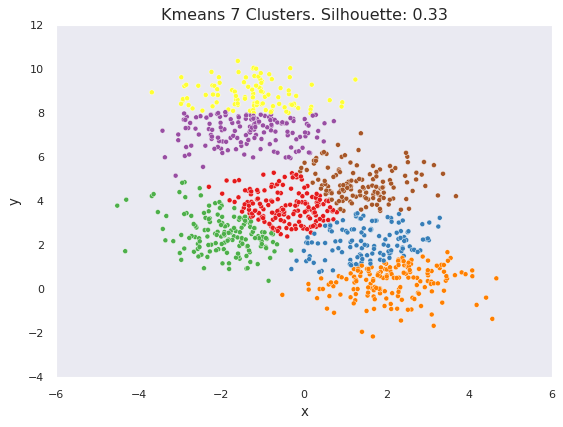

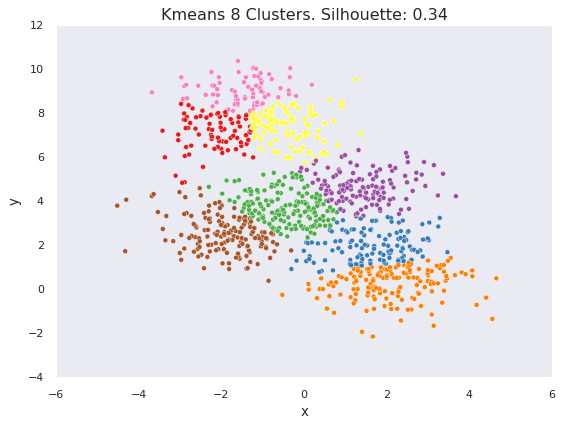

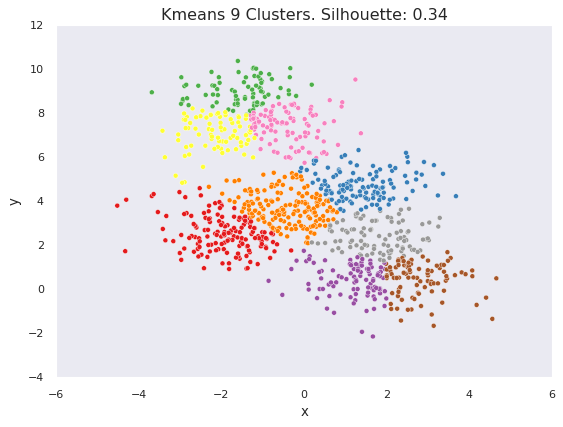

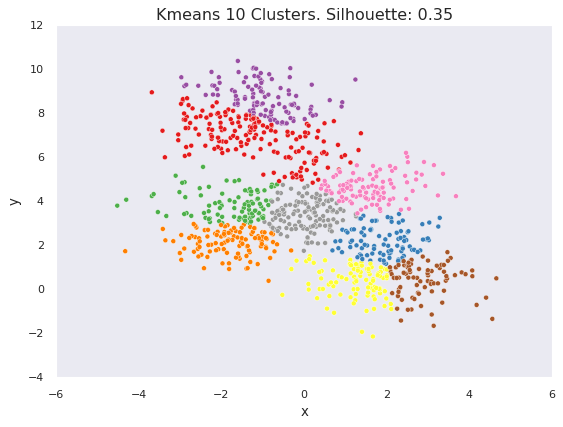

In [99]:
n_clusters = range(2, 11)
silhouette_coefficients = []

for num in n_clusters:
    model = KMeans(n_clusters=num, random_state=RANDOM_SEED)
    model.fit(X)

    silhouette_score = metrics.silhouette_score(X, model.labels_)
    silhouette_coefficients.append(silhouette_score)

    kmeans_df = pd.DataFrame(dict(
        x=X[:,0],
        y=X[:,1],
        label=model.labels_
    ))

    sns.scatterplot(x="x", y="y", data=kmeans_df, hue='label', palette='Set1', legend=False)
    plt.title(f"Kmeans {num} Clusters. Silhouette: {silhouette_score:.2f}")
    plt.show()

Plotting the silhouette metric values, we can easily observe the sharp drop after 4 clusters.
This is expected as we created our dataset to have 4 centers.

ValueError: x and y must have same first dimension, but have shapes (9,) and (20,)

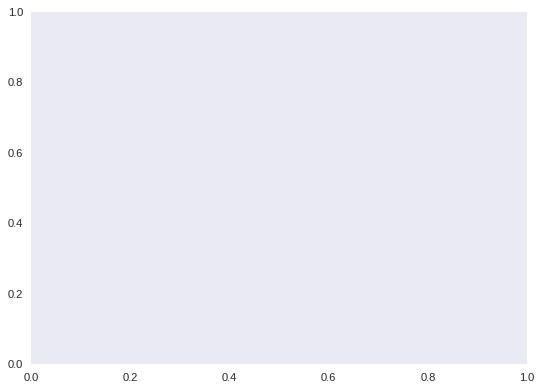

In [114]:
plt.style.use("seaborn-dark-palette")
plt.plot(n_clusters, silhouette_coefficients)
plt.xticks(n_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("K-Means Silhouette")

plt.savefig("Kmeans_shilhouette.png")
plt.show()

## DBSCAN
Next is DBSAN where we will adjust the density of the clusters by virtue of eps, while keeping a set number of
minimum samples to form a neighbourhood and a set distance metric (euclidean)

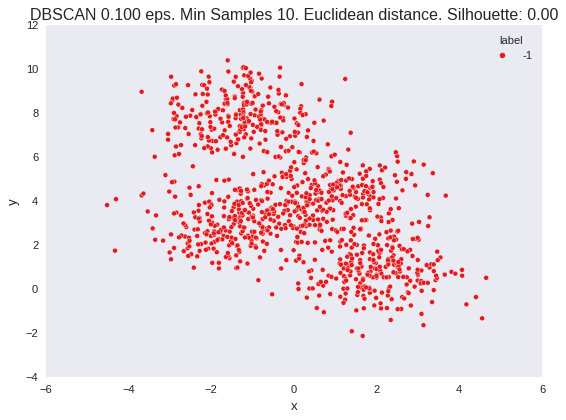

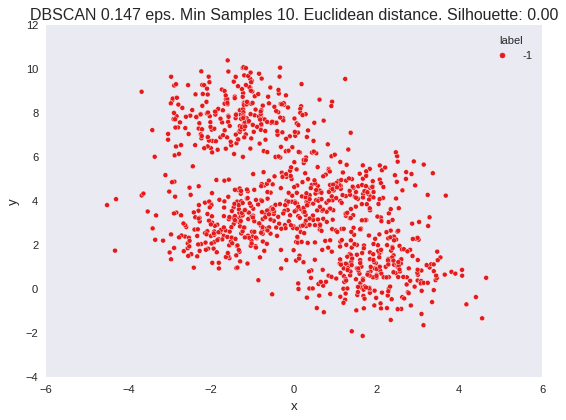

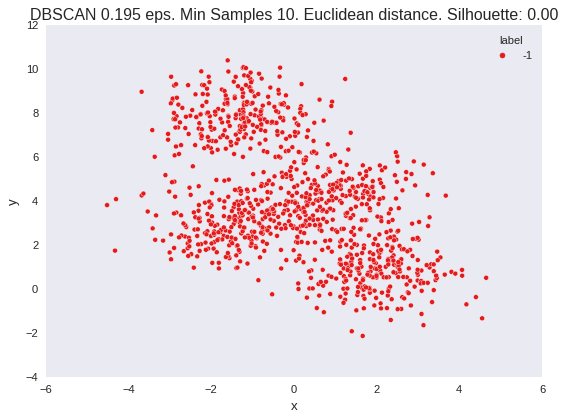

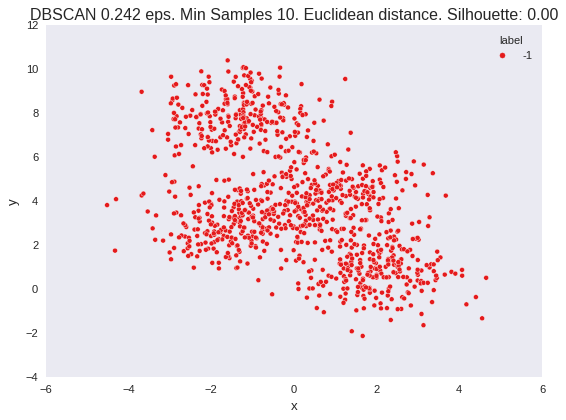

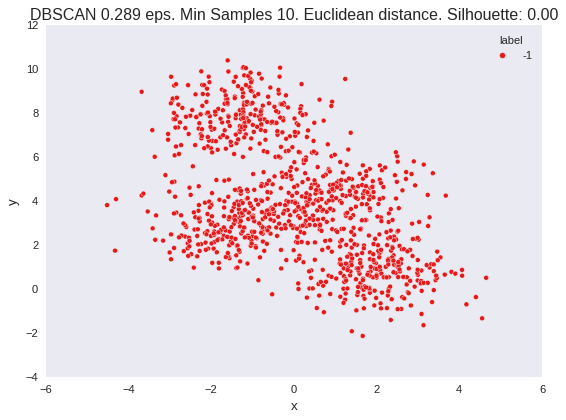

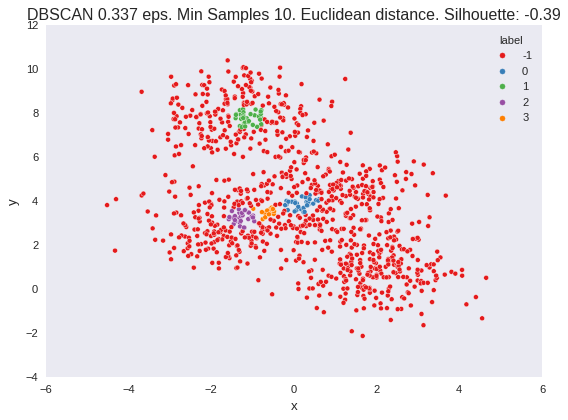

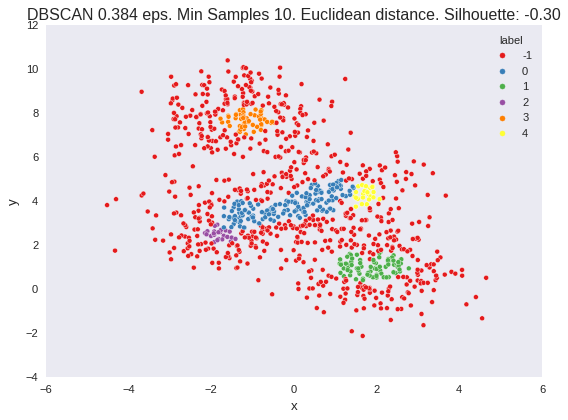

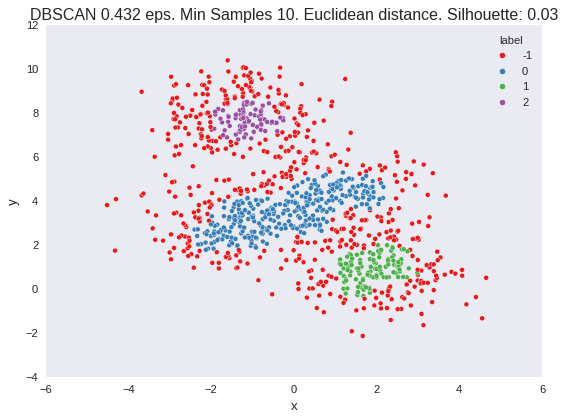

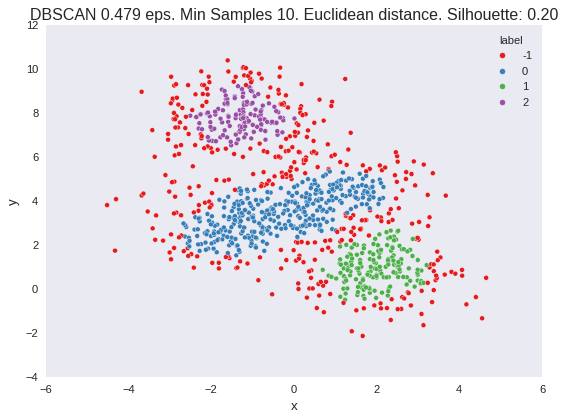

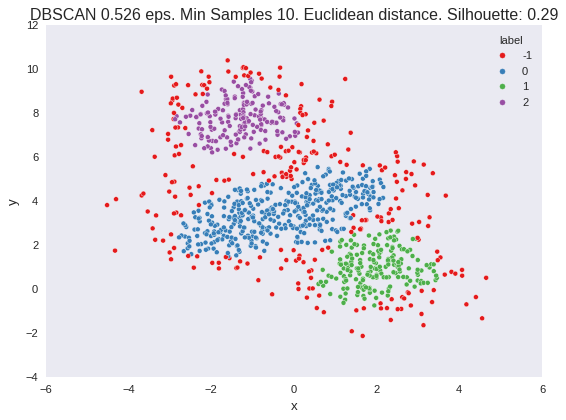

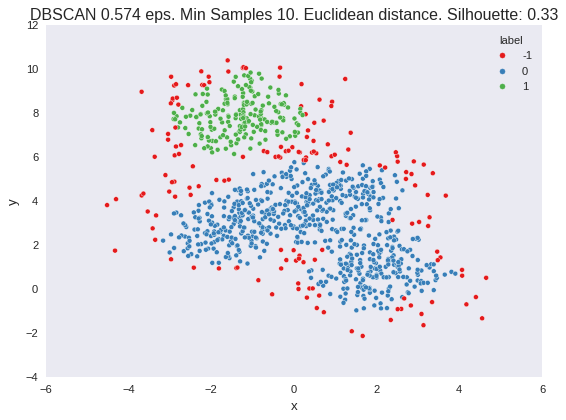

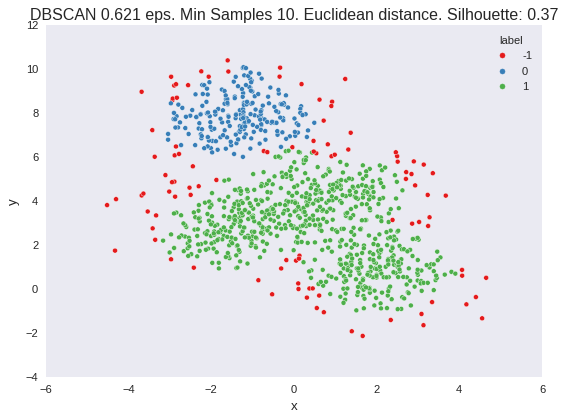

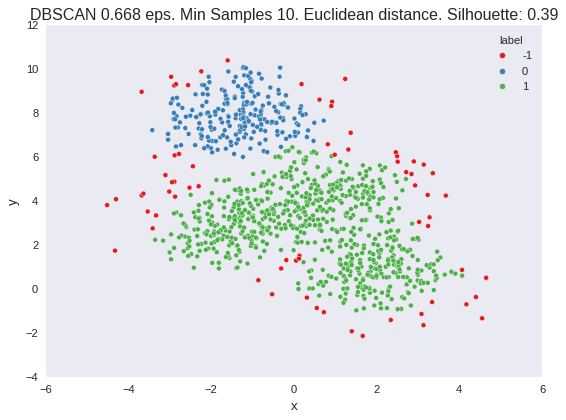

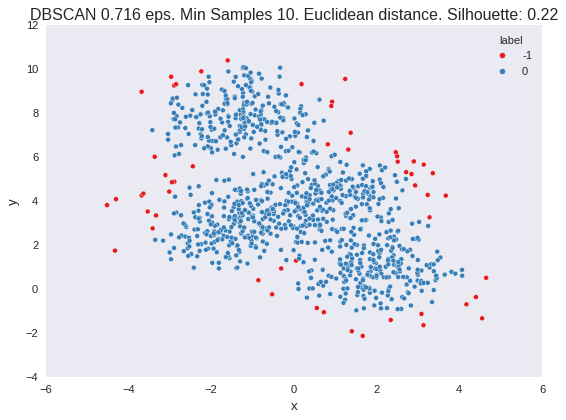

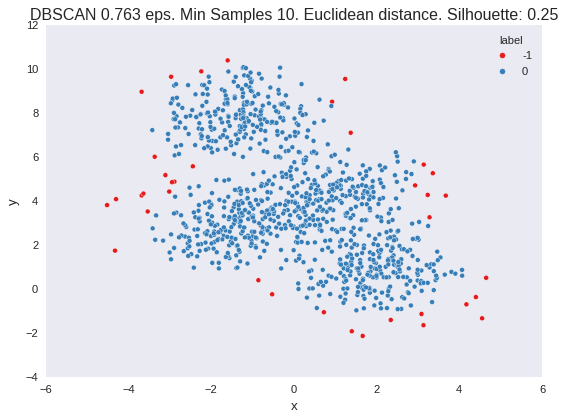

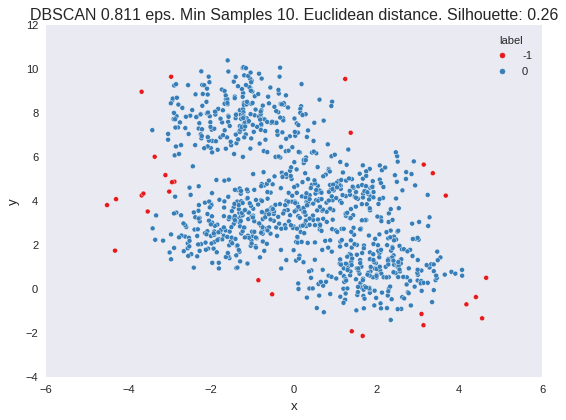

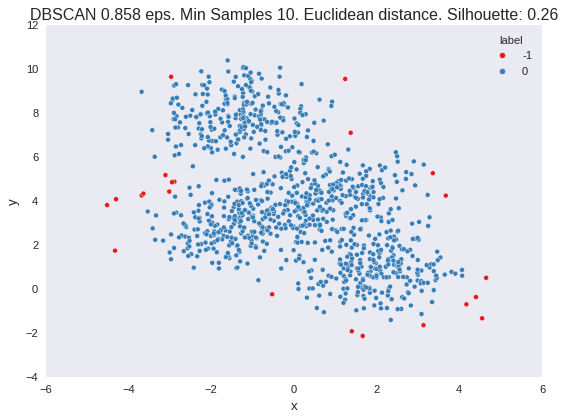

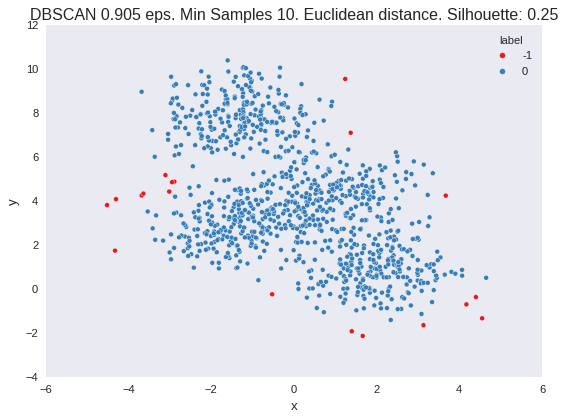

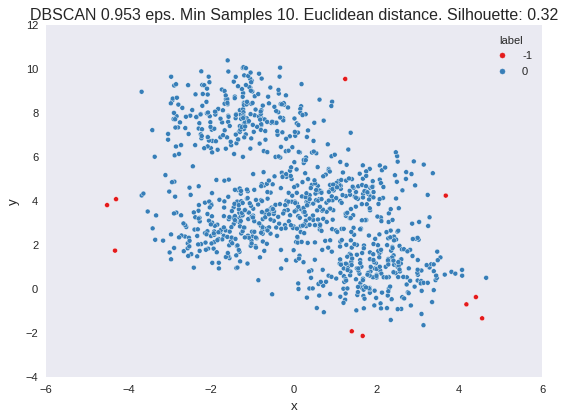

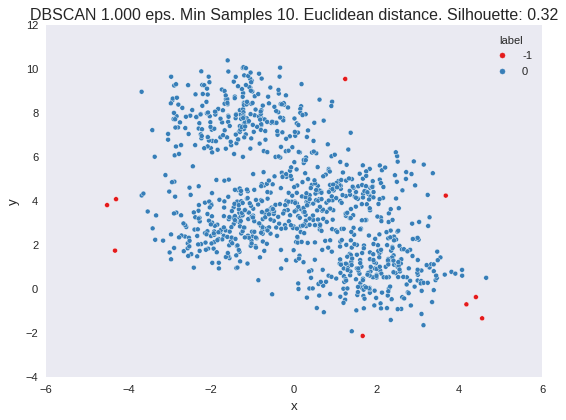

In [121]:
eps_range = np.linspace(0.1, 1, num=20)
silhouette_coefficients = []

for eps in eps_range:
    model = DBSCAN(eps=eps, min_samples=20, metric='euclidean')
    model.fit(X)

    try:
        silhouette_score = metrics.silhouette_score(X, model.labels_)
    except:
        silhouette_score = 0
    silhouette_coefficients.append(silhouette_score)

    dbscan_df = pd.DataFrame(dict(
        x=X[:,0],
        y=X[:,1],
        label=model.labels_
    ))

    sns.scatterplot(x="x", y="y", data=dbscan_df, hue='label', palette='Set1', legend=True)
    plt.title(f"DBSCAN {eps:.3f} eps. Min Samples 10. Euclidean distance. Silhouette: {silhouette_score:.2f}")
    plt.show()

The results are very interesting for DBSCAN. For small eps (given the min samples), the algorithm cannot create
clusters at all, thus silhouette is 0 (not defined).

As eps increases, many small clusters form tha slowly begin to merge. The algorithm reaches a highest silhouette score at around .65 with
at 2 formed clusters. This ofcourse is perhaps an intrisic weakness of the metric? as wewould expect the max score
to be when clusters are near to 4.

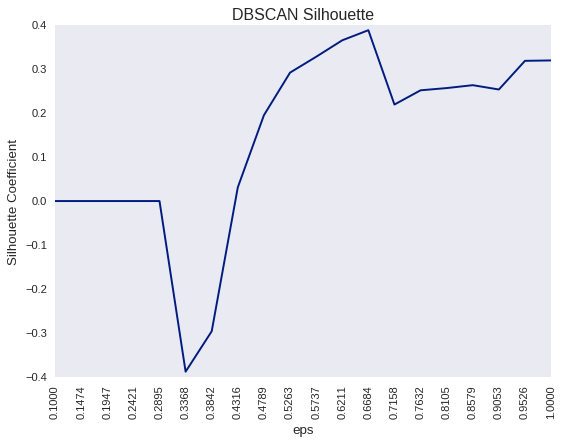

In [119]:
plt.style.use("seaborn-dark-palette")
plt.plot(eps_range, silhouette_coefficients)
plt.xticks(eps_range, rotation='vertical')
plt.xlabel("eps")
plt.ylabel("Silhouette Coefficient")
plt.title("DBSCAN Silhouette")

plt.savefig("DBSCAN_shilhouette.png")
plt.show()